/Users/emilvinther/ITU/3_semester/data mining/DataMining/utils.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['track_album_release_date'] = pd.to_datetime(
/Users/emilvinther/ITU/3_semester/data mining/DataMining/utils.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['track_album_release_date'].dt.year
/Users/emilvinther/anaconda3/envs/test/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 

Text(0, 0.5, 'sum of squared distances')

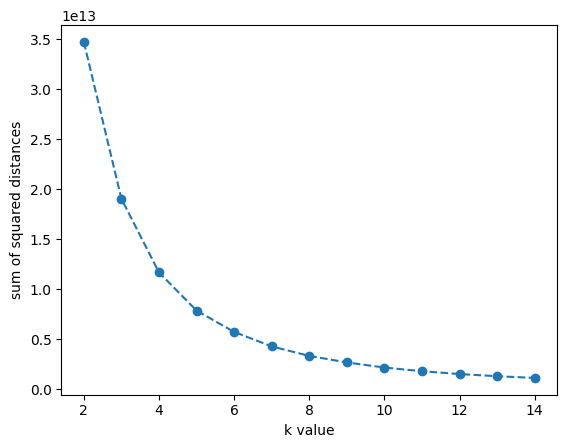

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from utils import get_dfs

data_df, numerical_df, holdout_df = get_dfs()
X = numerical_df
# K-MEANS
# sum of squared distances
ssd = []

for k in range(2, 15):
    model = KMeans(n_clusters=k)
    model.fit(X)
    # add the models sum of squared distances (inertia_) to ssd list to be able to do elbow plot
    ssd.append(model.inertia_)

# plot ssd
plt.plot(range(2, 15), ssd, 'o--')
plt.xlabel("k value")
plt.ylabel("sum of squared distances")

/Users/emilvinther/anaconda3/envs/test/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='cluster', ylabel='count'>

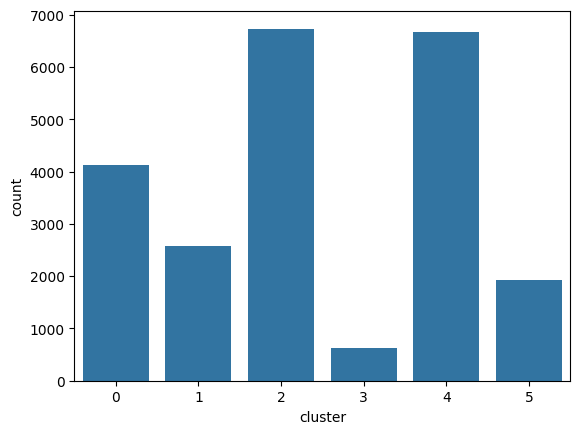

In [2]:
# data_df['playlist_genre'].unique()
# k=6 virker som et meget godt bud, især siden det er det antal genrer der allerede er defineret
model = KMeans(n_clusters=6)
data_df['cluster'] = model.fit_predict(X)
data_df.head()

sns.countplot(data_df, x=data_df['cluster'])

<Axes: xlabel='cluster', ylabel='track_popularity'>

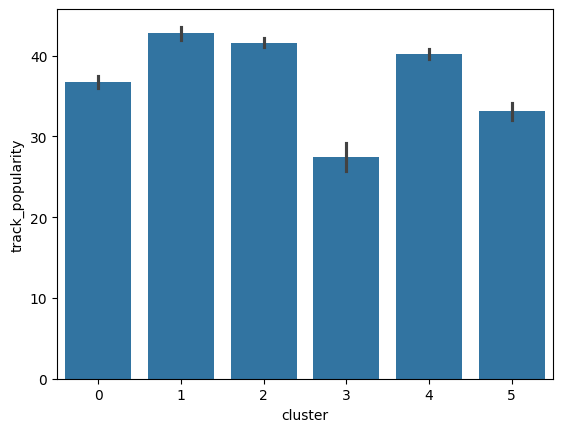

In [3]:
sns.barplot(data_df, x='cluster', y='track_popularity')

<Axes: xlabel='playlist_genre', ylabel='count'>

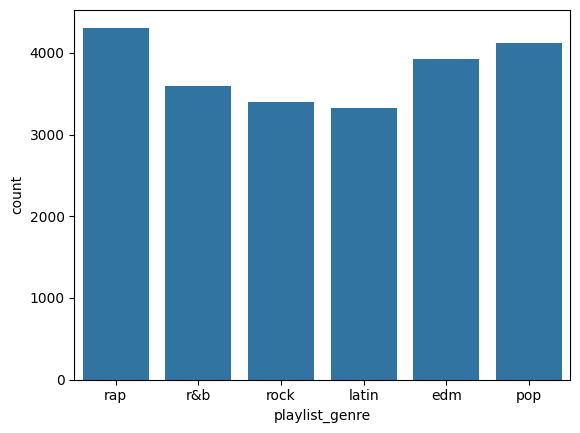

In [4]:
sns.countplot(data_df, x=data_df['playlist_genre'])

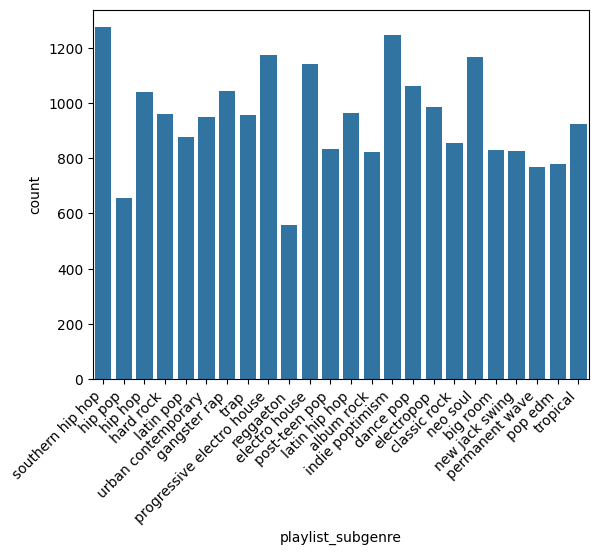

In [5]:
sns.countplot(data=data_df, x='playlist_subgenre')
plt.xticks(rotation=45, ha='right')
plt.show()

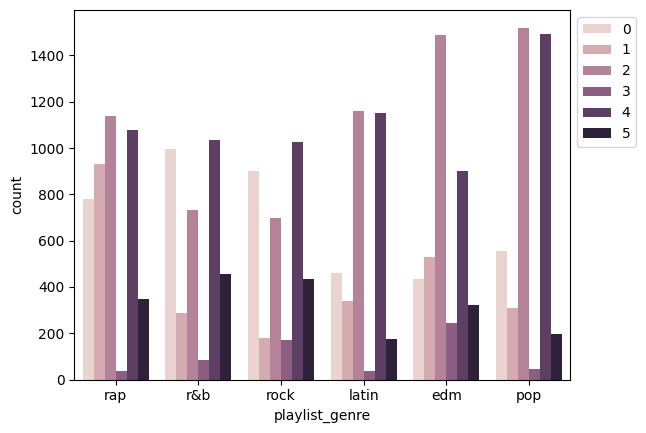

In [6]:
ax = sns.countplot(data_df, x='playlist_genre', hue='cluster')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

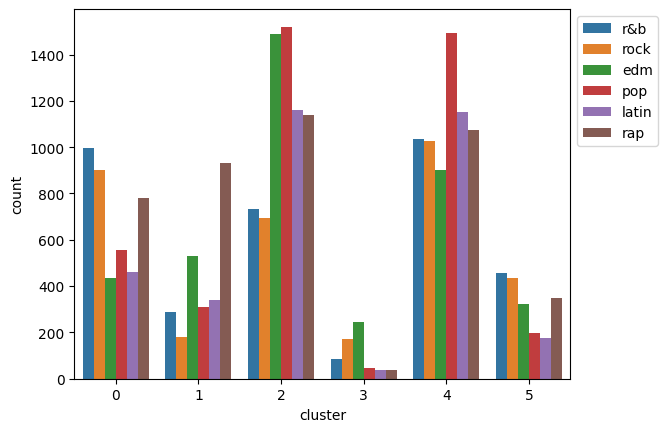

In [7]:
ax = sns.countplot(data_df, x='cluster', hue='playlist_genre')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<Axes: xlabel='cluster', ylabel='playlist_genre'>

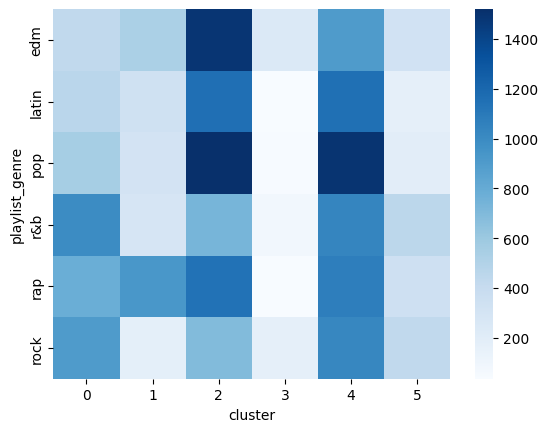

In [8]:
cross_tab = pd.crosstab(data_df['playlist_genre'], data_df['cluster'])
sns.heatmap(cross_tab, cmap='Blues')

In [9]:
cross_tab

cluster,0,1,2,3,4,5
playlist_genre,,,,,,
edm,435,530,1488,246,901,324
latin,462,340,1159,36,1150,175
pop,555,309,1520,47,1494,198
r&b,997,289,733,86,1035,457
rap,779,930,1140,39,1076,347
rock,900,179,696,170,1025,434


In [10]:
# EDA
# investigating mean values for each feature grouped by genre and grouped by cluster
feature_stats = {}
for feature in X.keys():
    genre_stats = {}
    cluster_stats = {}
    for genre in data_df['playlist_genre'].unique():
        genre_stats[genre] = data_df[feature][data_df['playlist_genre']
                                              == genre].mean()

    for cluster in data_df['cluster'].unique():
        cluster_stats[cluster] = data_df[feature][data_df['cluster']
                                                  == cluster].mean()
    feature_stats[f'{feature}_genre'] = genre_stats
    feature_stats[f'{feature}_cluster'] = cluster_stats

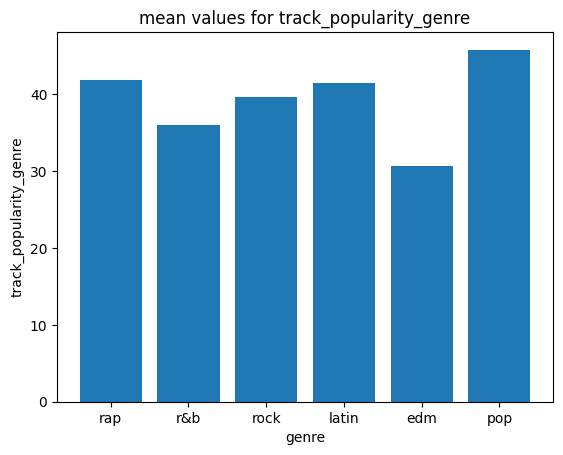

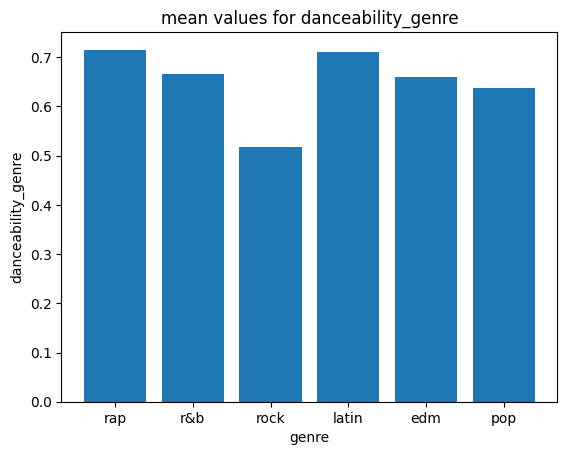

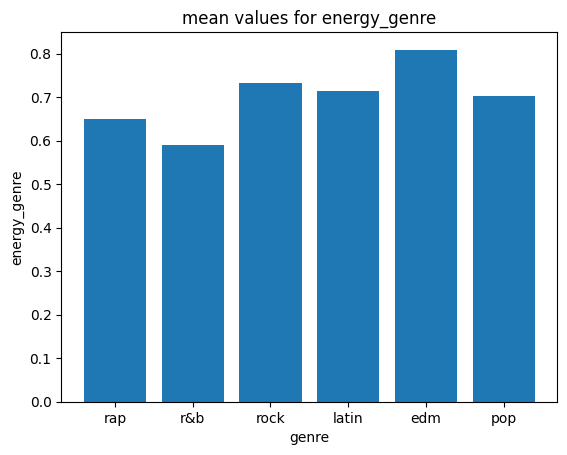

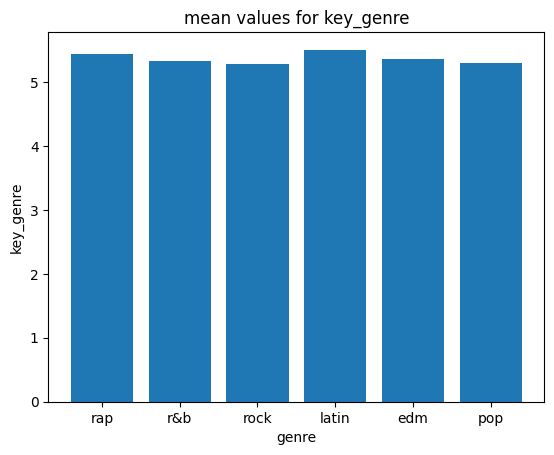

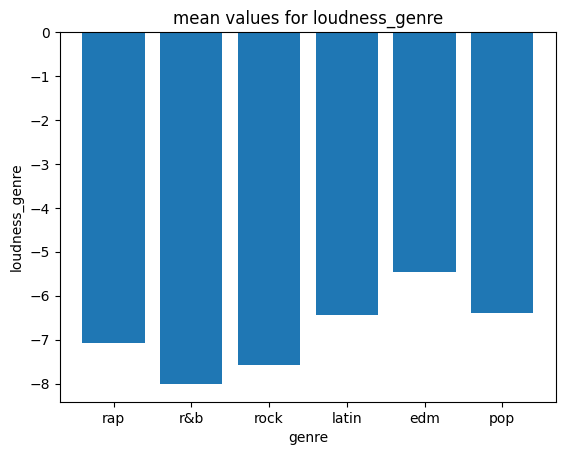

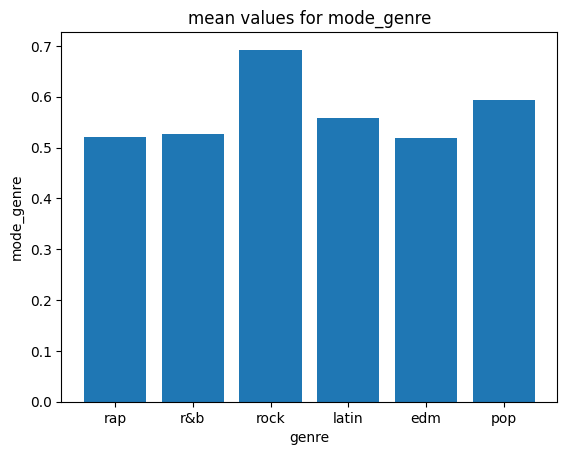

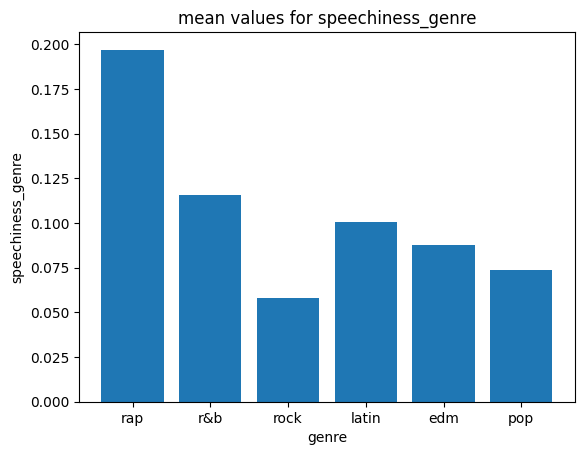

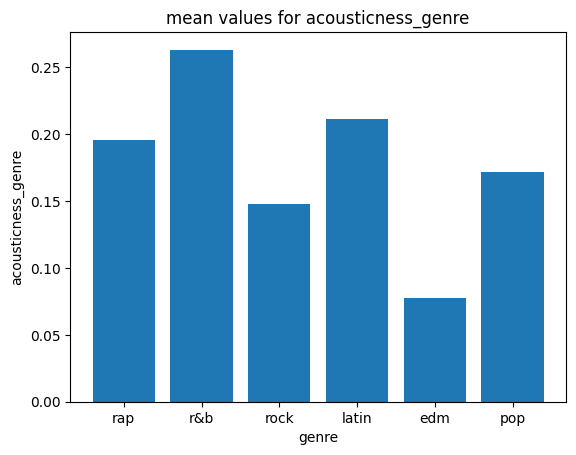

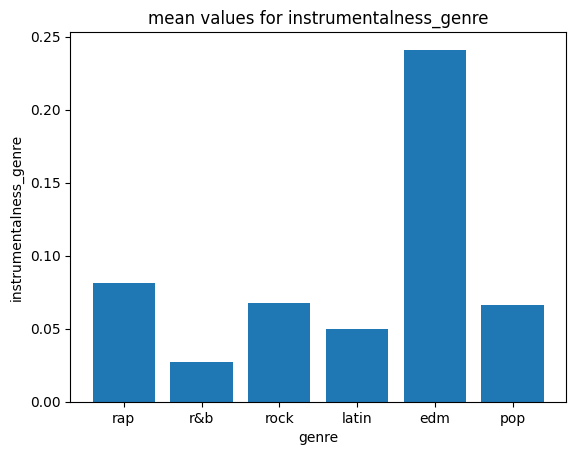

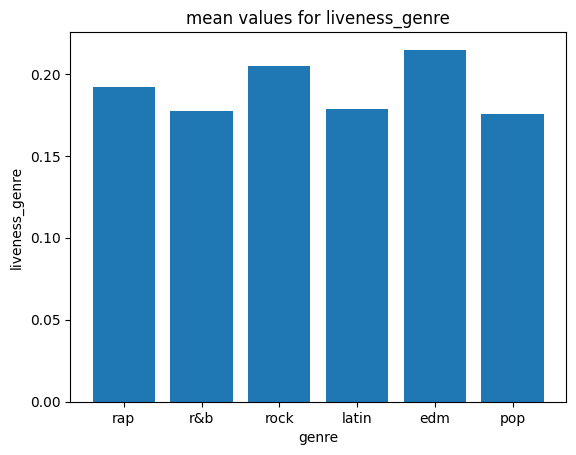

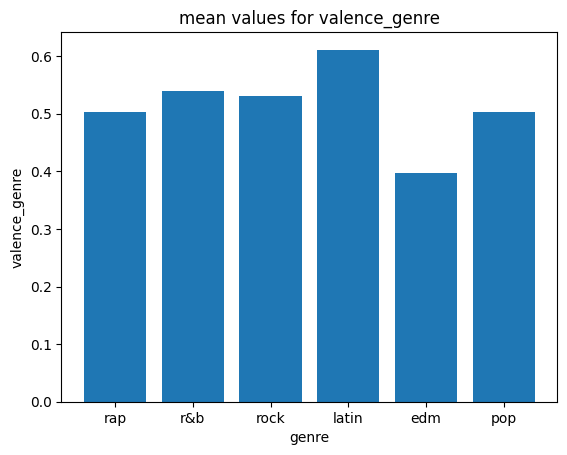

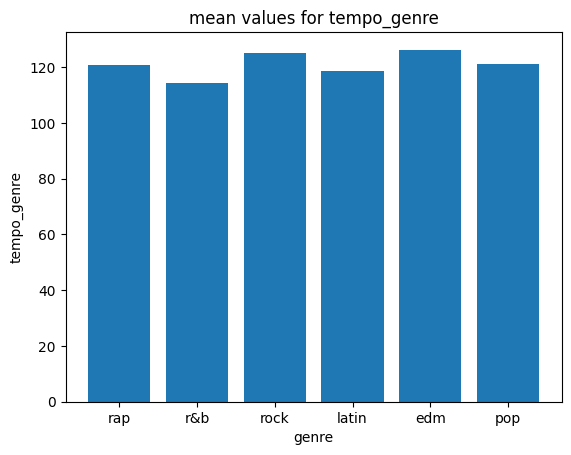

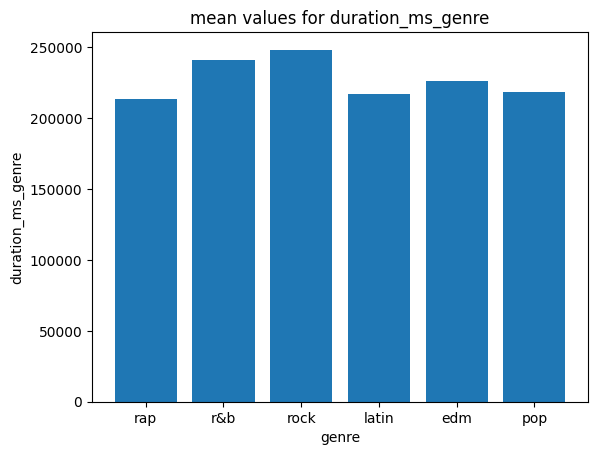

In [11]:
for feature_key, stats in feature_stats.items():
    if 'genre' in feature_key:
        plt.bar(stats.keys(), stats.values())
        plt.title(f'mean values for {feature_key}')
        plt.xlabel('genre')
        plt.ylabel(feature_key)
        plt.show()

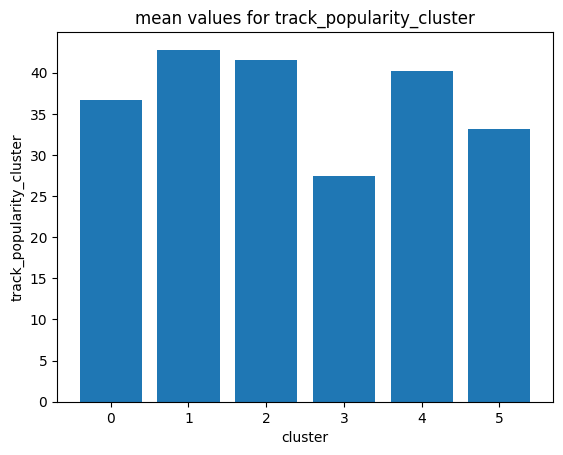

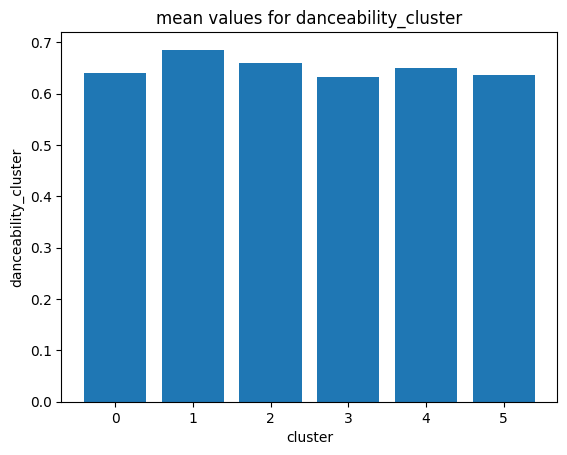

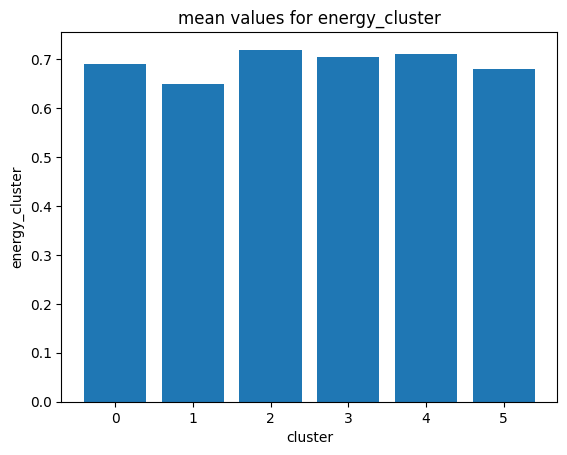

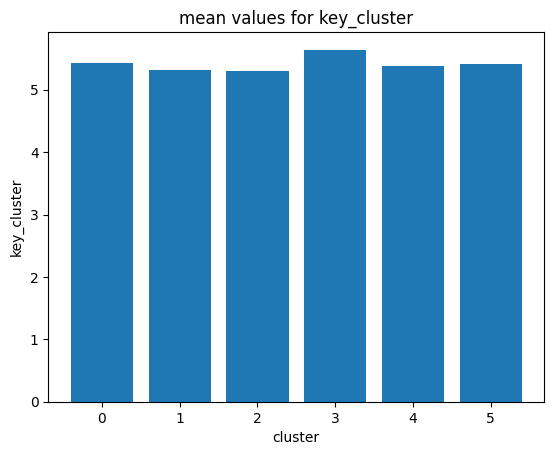

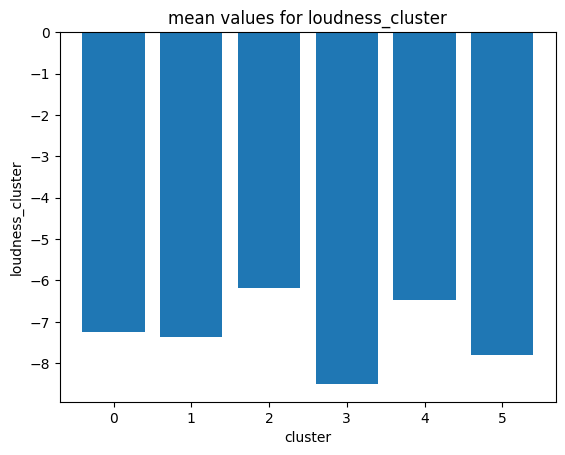

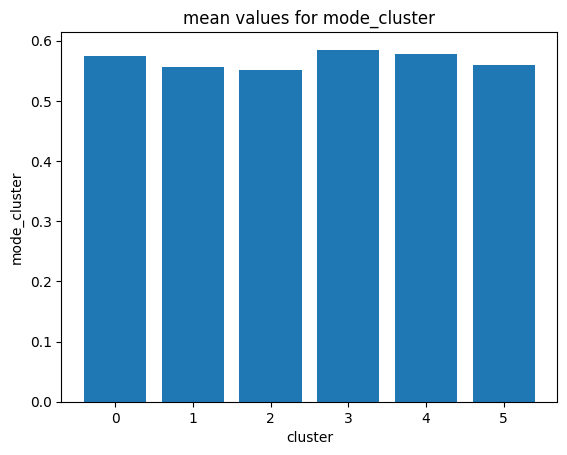

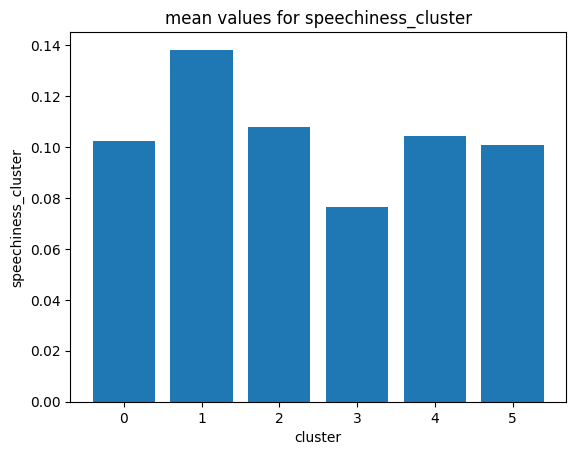

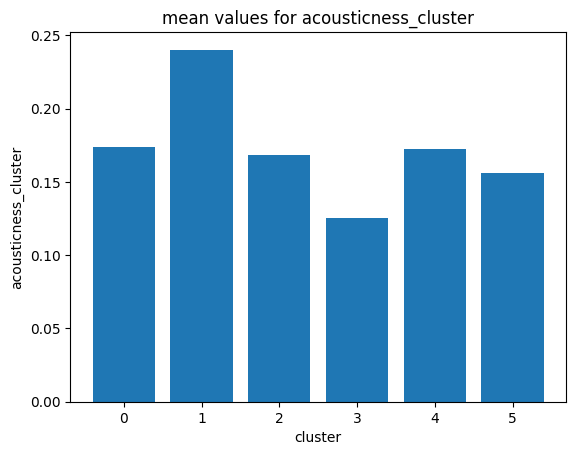

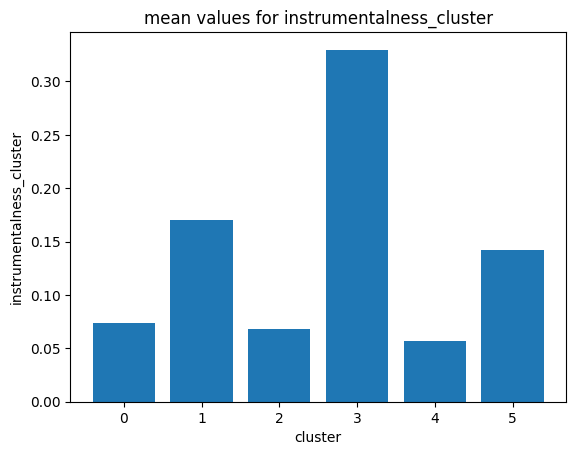

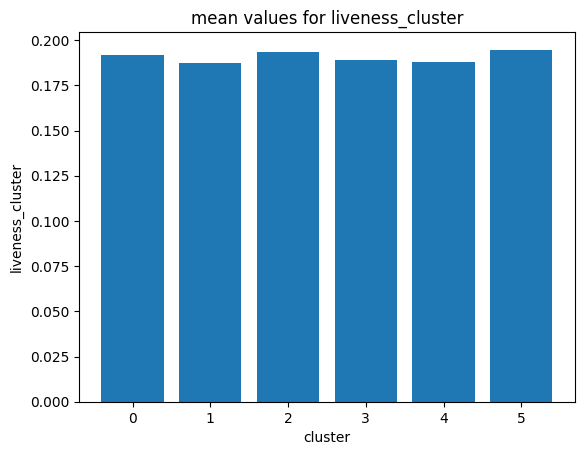

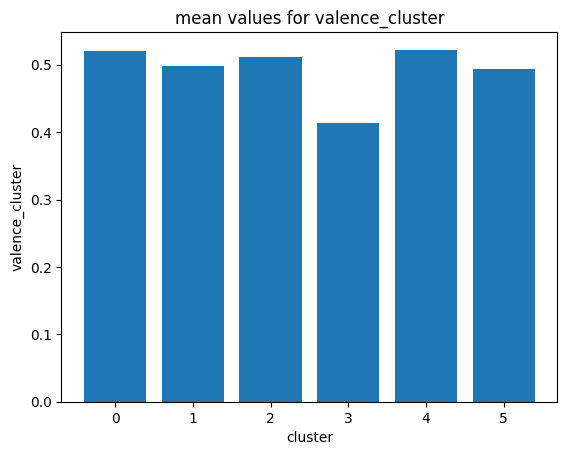

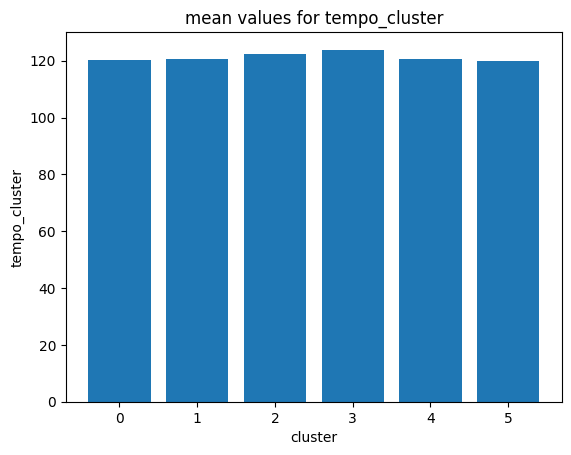

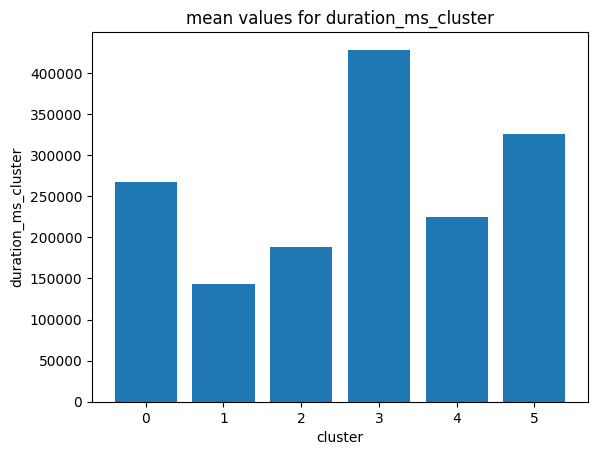

In [12]:
for feature_key, stats in feature_stats.items():
    if 'cluster' in feature_key:
        plt.bar(stats.keys(), stats.values())
        plt.title(f'mean values for {feature_key}')
        plt.xlabel('cluster')
        plt.ylabel(feature_key)
        plt.show()